## Суммирование рядов
Рассмотрим метод вычисления экспоненты, основанный на суммировании её ряда Тейлора в окрестности $x = 0$

$$
e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}
$$

Этот ряд сходится абсолютно при любом $x$ и, с точки зрения математического анализа, пригоден для вычисления экспоненты всюду.

Просуммировать бесконечное число слагаемых мы не в состоянии, поэтому оставим лишь конечное число слагаемых в ряду:
$$
S_n(x) = \sum_{k=0}^n \frac{x^k}{k!}.
$$
Так как исходный ряд сходится, $S_n(x) \underset{n \to \infty}{\longrightarrow} e^x$.

In [1]:
import math

def myexp1(x, n):
    S = 0
    for k in range(n+1): # k = 0, 1, ..., n
        S += math.pow(x, k) / math.factorial(k)
    return S

In [2]:
myexp1(1, 20) - math.exp(1)

4.440892098500626e-16

Данная реализация имеет несколько недостатков:
 * Реализует $e^x$ через более сложные функции $x^y, k!$
 * Обе функции $x^k$ и $k!$ могут расти и легко выйти за пределы типа float (аналог double в C)

In [3]:
# Раскомментируйте следующую строку, чтобы увидеть OverflowError
# myexp1(3, 1000)

# ---------------------------------------------------------------------------
# OverflowError                             Traceback (most recent call last)
# <ipython-input-4-41660cb1f885> in <module>()
#       1 # Раскомментируйте следующую строку, чтобы увидеть OverflowError
# ----> 2 myexp1(3, 1000)

# <ipython-input-1-e7e262a3e6f5> in myexp1(x, n)
#       4     S = 0
#       5     for k in range(n+1): # k = 0, 1, ..., n
# ----> 6         S += math.pow(x, k) / math.factorial(k)
#       7     return S

# OverflowError: int too large to convert to float

Обозначим $a_k = \frac{x^k}{k!}$. Тогда
$$
S_n = \sum_{k=0}^{n} a_k
$$
Зная $a_{k-1}$, на самом деле, легко можно вычислить $a_k$, не прибегая к сложным функциям:
$$
a_k = a_{k-1} \frac{x}{k}, \qquad k > 0
$$

In [4]:
def myexp2(x, n):
    a = 1 # Значение a_0
    S = a # Отдельно добавим к S значение a_0
    for k in range(1, n+1): # k = 1, ..., n
        # Сейчас a содержит a_{k-1}
        a *= x / k
        # Теперь a содержит a_k
        S += a
    return S

In [5]:
myexp2(3, 1000)

20.08553692318766

### Измерение времени 
В jupyter notebook можно удобно узнать, сколько по времени выполняется код, используя магические команды **%%timeit** (для всей ячейки) и **%timeit** (для одной строки). Список других магических команд можно найти в [документации](http://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [6]:
%timeit myexp1(3, 100)

10000 loops, best of 3: 112 µs per loop


In [7]:
%timeit myexp2(3, 100)

100000 loops, best of 3: 9.03 µs per loop


In [8]:
%%timeit
S = 0
for j in range(1000000):
    S += j
S

10 loops, best of 3: 57.7 ms per loop


### Графики с использованием matplotlib

Возможности библиотеки **matplotlib** очень похожи на возможности Matlab для отрисовки графиков. Большинство функций имеют те же имена и принимают аналогичные параметры. Большое количество примеров [тут](https://matplotlib.org/gallery.html).

Функции для рисования находятся не в самой библиотеке **matplotlib**, а в ее разделе **pyplot**. Чтобы не писать длинное слово **pyplot** его часто сокращают до **plt**. Библиотека **matplotlib** поддерживает несколько способов вывода изображений (возможности также отличаются для разных платформ). Наиболее удобный способ отображения &mdash; прямо в активный jupyter notebook включается магисческой командой **%matplotlib inline**.

Иногда бывает необходимо настроить **matplotlib**, например, увеличить стандартный шрифт. Для этого можно использовать **plt.rc**.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=12)

Основная функция для рисования графиков &mdash; **plt.plot** может изобразить набор точек, задаваемых координатами x и y. Стиль линии задается третим аргументом

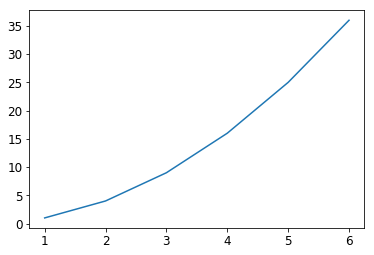

In [10]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]
plt.plot(x, y)

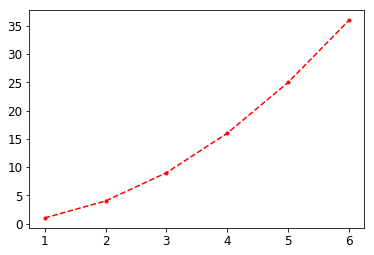

In [11]:
plt.plot(x, y, 'r.--')

Несколько вызовы **plot** в одной ячейке будут отрисовывать графики на той же координатной плоскости. Если необходимо отобразить несколько графиков отдельно, можно создать новый рисунок, вызвав **plt.figure** или разбить рисунок на несколько зон с помощью функции **plt.subplot**.

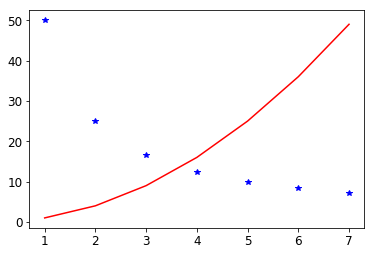

In [12]:
plt.plot([1, 2, 3, 4, 5, 6, 7], [1, 4, 9, 16, 25, 36, 49], 'r')
plt.plot([1, 2, 3, 4, 5, 6, 7], [50, 50/2, 50/3, 50/4, 50/5, 50/6, 50/7], 'b*')

(-0.1, 1.1)

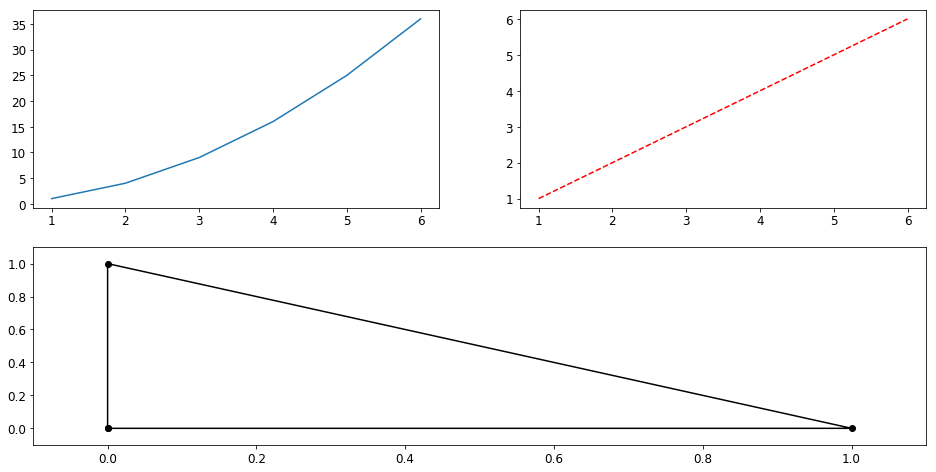

In [13]:
# Создаем рисунок размера 16х8 ~ на весь экран
plt.figure(figsize=(16, 8))

# Переключаемся на первый график в сетке 2х2
plt.subplot(2, 2, 1)
plt.plot(x, y)

# Переключаемся на второй график (правый верхний) в той же сетке
plt.subplot(2, 2, 2)
plt.plot(x, x, 'r--')

# Переключаемся на нижний график в сетке 2x1 (будет занимать место третьего и четвертого в сетке 2x2)
plt.subplot(2, 1, 2)
# Нарисуем треугольник из трех отрезков
plt.plot([0, 1, 0, 0], [0, 0, 1, 0], 'ko-')
# Раздвинем границы осей
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

Для рисования графиков в логарифмическом масштабе удобно можно использовать функции **plt.semilogx** (логарифмическая ось x), **plt.semilogy** (логарифмическая ось x), **plt.loglog** (обе оси логарифмические). Координатную сетку можно отобразить с помощью **plt.grid**.

Для добавления легенды к графику необходимо вызвать **plt.legend** (опционально указать положение можно с помощью аргумента **loc='<положение>'**). Подписи к графикам указываются в команде **plot** с помощью аргумента **label='<подпись>'**. Также можно озаглавить рисунок (**plt.title**) и оси (**plt.xlabel**, **plt.ylabel**).

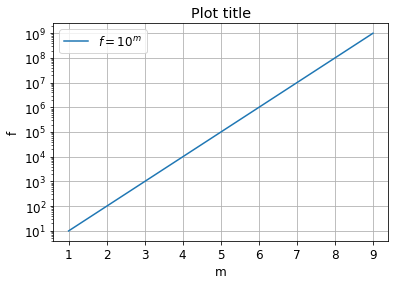

In [14]:
plt.semilogy([1, 2, 3, 4, 5, 6, 7, 8, 9], [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9], label='$f=10^m$')
plt.title('Plot title')
plt.xlabel('m')
plt.ylabel('f')
plt.grid()
plt.legend(loc='best')

### Массивы из библиотеки numpy
Встроенные в python списки [...] далеко не всегда удобны для прикладных задач, особенно для вычислительных задач. Основные удобства списков:
* Список довольно легко можно удленить или соединить с другим списком

In [15]:
x = []
for i in range(10):
    x.append(i) # добавляем элемент i к списку
y = [20]*5 # Список из 5 копий элемента 20
z = x + y  # Конкатенация списков
print(z)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 20, 20, 20, 20]


* Списковое включение (list comprehension) [документация](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

In [16]:
x = [-5.0 + 10 * i / 20 for i in range(21)]
print(x)

[-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


Довольно часто хочется, чтобы списки вели себя как вектора (могли складываться, вычитаться, умножаться на число и т.п.). Такой функционал представляют массивы из библиотеки **numpy**. Чтобы не писать длинное название **numpy** его часто сокращают до **np**.

In [17]:
import numpy as np
x = np.array([1, 2, 3.5, 100]) 
print(x)

[   1.     2.     3.5  100. ]


Стандартные математические функции содержатся в библиотеке **numpy**, причем они могут принимать массив в качестве аргумента. В этом случае функция применяется к каждому элементу в отдельности. Это же касается и арифметических функций. Пот необходимости **numpy** умеет превращать число в массив (если это имеет смысл). Также функции **numpy** умеют автоматически превращать списки в массивы, если они получают на вход список.

In [18]:
print(np.exp(-x) + 1)               # Прибавляем к массиву число
print(np.abs([-5, 2, 10, -6, -10])) # Передаем обычный список на вход функции numpy

[ 1.36787944  1.13533528  1.03019738  1.        ]
[ 5  2 10  6 10]


В **numpy** содержится большое число функций общего назначения, доступных в Matlab:

In [19]:
print(np.linspace(-1, 1, 11))    # массив равномерно расположенных чисел от -1 до 1 из 11 элементов
print(np.diff([1, 2, 4, 8, 12])) # Массив из разностей соседних элементов

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[1 2 4 4]


### Исследуем точность нашей функции для вычисления экспоненты
Если посмотреть на реализацию функции myexp2, окажется, что она вполне может принимать в качестве x массив.

In [20]:
x = np.linspace(-1, 1, 5)
print('myexp(x) =', myexp2(x, n=5))
print('  exp(x) =', np.exp(x))

myexp(x) = [ 0.36666667  0.60651042  1.          1.64869792  2.71666667]
  exp(x) = [ 0.36787944  0.60653066  1.          1.64872127  2.71828183]


Начертим график функции myexp2

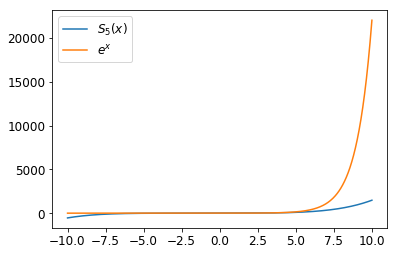

In [21]:
x = np.linspace(-10, 10, 500) # 500 точек на отрезке [-10, 10]
plt.plot(x, myexp2(x, n=5), label='$S_5(x)$')
plt.plot(x, np.exp(x), label='$e^x$')
plt.legend(loc='best')

Построим график относительной ошибки вычисления
$$
\varepsilon(x) = \frac{|e^x - S_n(x)|}{e^x}
$$

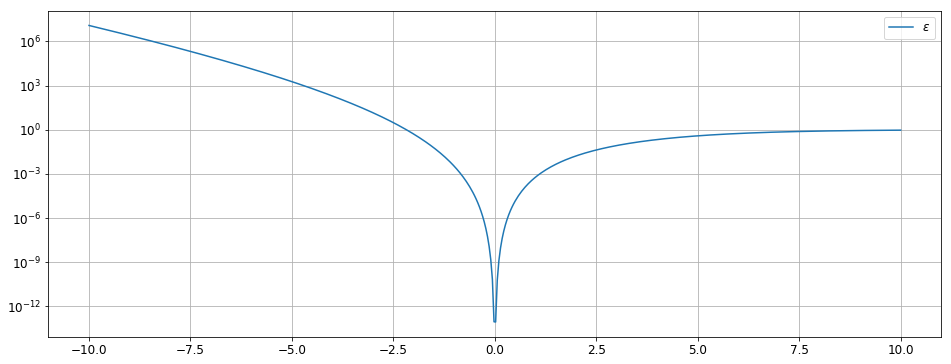

In [22]:
x = np.linspace(-10, 10, 500)
ex = np.exp(x)
Sn = myexp2(x, n=5)

plt.figure(figsize=(16, 6))
plt.semilogy(x, np.abs(ex - Sn) / ex, label=r'$\varepsilon$')
plt.grid()
plt.legend(loc='best')

Хорошо видно, что точность вычисления экспоненты таким способом резко снижается при удалении от точки $x = 0$. Попробуем взять больше слагаемых в ряду.

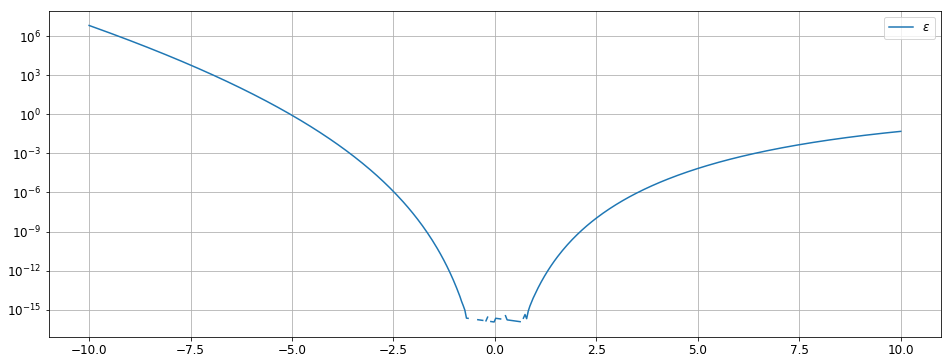

In [23]:
x = np.linspace(-10, 10, 500)
ex = np.exp(x)
Sn = myexp2(x, n=15) # Теперь слагаемых 15

plt.figure(figsize=(16, 6))
plt.semilogy(x, np.abs(ex - Sn) / ex, label=r'$\varepsilon$')
plt.grid()
plt.legend(loc='best')

Ситуация улучшилась на отрезке $\sim [-1, 1]$, где ошибка стала порядка ошибки представления чисел типа double. Попробуем радикально увеличить число слагаемых.

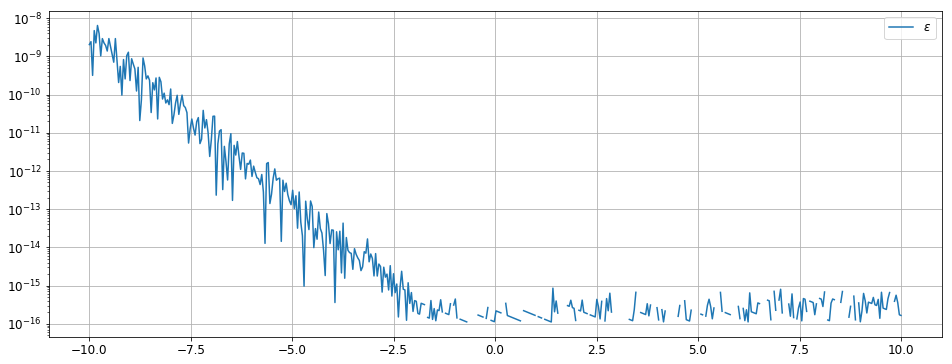

In [24]:
x = np.linspace(-10, 10, 500)
ex = np.exp(x)
Sn = myexp2(x, n=500) # Теперь слагаемых 500

plt.figure(figsize=(16, 6))
plt.semilogy(x, np.abs(ex - Sn) / ex, label=r'$\varepsilon$')
plt.grid()
plt.legend(loc='best')

<h2><span style="color:red">Вопрос №1</span></h2>
Почему при $x < 0$ относительная погрешность вычисления $e^x$ суммированием ряда Тейлора дает такую большую погрешность? Почему этого не происходит в области $x > 0$, где ошибка порядка $10^{-15} \div 10^{-16}$, т.е. порядка ошибки представления чисел.

<h2><span style="color:green">Ответ №1</span></h2>
Так как ряд является знакопеременным. 

$$
\varepsilon_{окр} \leqslant e^{|x|}\delta 
$$

$$ 
\frac{\varepsilon_{окр}}{e^x} 
\approx 
\begin{cases}
    \varepsilon_{окр}e^{|x|} &\text{при $x < 0$} \\
    \varepsilon_{окр}e^{-|x|} &\text{при $x > 0$}
\end{cases}
$$

$$ 
\frac{|e^x - \tilde{S}_n|}{e^x}
\approx 
\begin{cases}
   \delta  &\text{se $x>0$}\\
   \delta e^{2|x|} &\text{se $x<0$}
\end{cases}
 $$

<h2><span style="color:red">Задание №1</span></h2>
Напишите функцию, вычисляющую $e^x$, которая принимает три аргумента: x, n, m. Работа этой функции должна быть основана на соотношении
$$
\exp{x} = \left(\exp\frac{x}{2^m}\right)^{2^m}.
$$
Для быстрого возведения в степерь $2^m$ можно использовать [повторное возведение в квадрат](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B3%D0%BE_%D0%B2%D0%BE%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B2_%D1%81%D1%82%D0%B5%D0%BF%D0%B5%D0%BD%D1%8C):
```
z = x
повторить m раз {
    z = z*z
}
```
Для вычисления $\exp\frac{x}{2^m}$ воспользуйстесь суммированием первых $n$ слагаемых ряда. Ваше решение не должно использовать явных операций возведения в степень. Постарайтесь найти оптимальные (по относительной погрешности и количеству операций) значения $n, m$ для вычисления экспоненты на отрезке $[-10, 10]$. Нарисуйте для этого случая график относительной погрешности.

<h2><span style="color:green">Выполенение задания №1</span></h2>

In [25]:
def rep_sq_pow(val, m):
    """
    Auxilary function, which pows val to 2^m.
    """
    ret = val
    for i in range(m):
        ret *= ret
        
    return ret

In [27]:
def exp_2_m(x, n, m):
    """
    Calculates exp(x) using Taylor series containing n members for 2^m compressed x.
    """
    assert(isinstance(n , int))
    assert(isinstance(m , int))
    assert(m >= 0)
    
    exp_arg = x / (float(2 << m-1) if m !=0 else 1)
    #я позволил себе использовать написанную Вами функцию
    exp_val = myexp2(exp_arg, n)
    
    return rep_sq_pow(exp_val, m)

Выбор опитмальных параметров 

In [28]:
x_max = 10
n_min = 7
n_max = 45
m_max = 32
opt_n_m = (n_max, m_max)

#так как возведение в степень аккумулирует ошибку, 
#то будем штрафовать за большие значения m
def value(n, m):
    return n + 2 * m

def rel_err(x, n, m):
    ex = np.exp(x)
    return np.abs(exp_2_m(x, n, m) - ex) / ex
    
for n in range(n_min, n_max):
    for m in range(m_max):
        if abs(rel_err(-abs(x_max), n, m) - rel_err(abs(x_max), n, m)) < 1e-14:
            #print(n, m)
            if value(*opt_n_m) > value(n, m):
                opt_n_m = (n, m)
print(opt_n_m)

(8, 7)


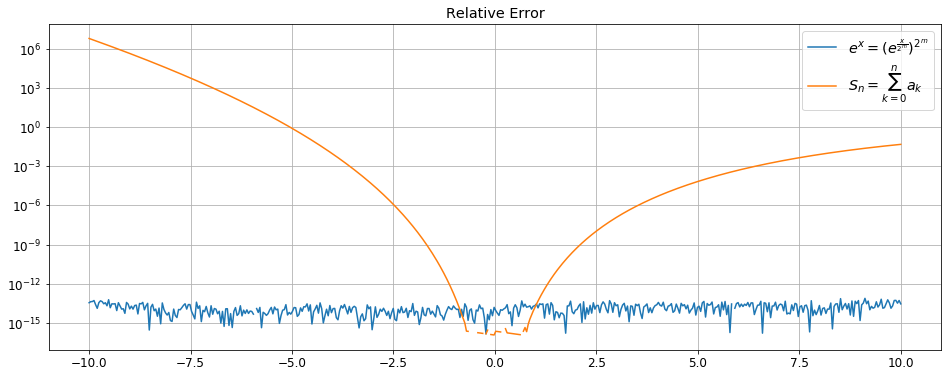

In [29]:
x = np.linspace(-10, 10, 500)
ex = np.exp(x)
Sn_2_m = exp_2_m(x, *opt_n_m) # Теперь слагаемых 15
Sn_ex2 = myexp2(x, n=15) # Теперь слагаемых 15

plt.figure(figsize=(16, 6))
plt.title('Relative Error')
plt.semilogy(x, np.abs(Sn_2_m - ex) / ex, label=r'$e^x = \left(e^{\frac{x}{2^m}}\right)^{2^m}$')
plt.semilogy(x, np.abs(Sn_ex2 - ex) / ex, label=r'$S_n = \sum_{k=0}^{n} a_k$')
plt.grid()
plt.legend(loc='best', fontsize='large')

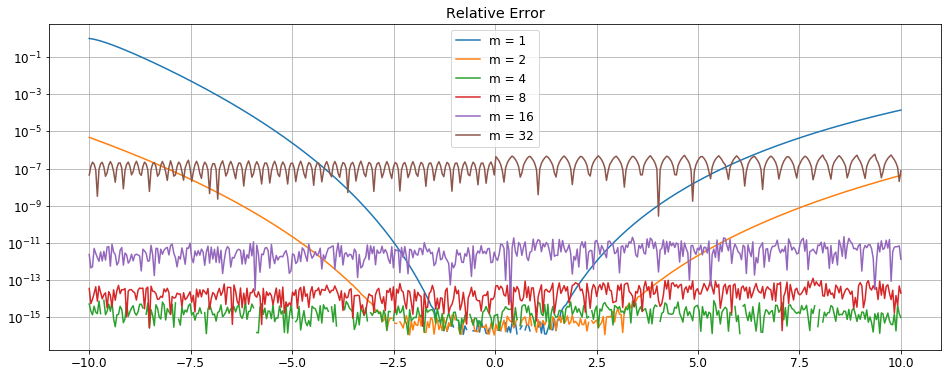

In [30]:
p = 6

plt.figure(figsize=(16, 6))
plt.title('Relative Error')

x = np.linspace(-10, 10, 500)
ex = np.exp(x)
for m in 2 ** np.arange(p):
    Sn_2_m = exp_2_m(x, n=15, m=int(m)) # Теперь слагаемых 15
    plt.semilogy(x, np.abs(Sn_2_m - ex) / ex, label=f'm = {m}')
    
plt.grid()
plt.legend(loc='best')

Здесь явным образом можно наблюдать накапливание ошибки с ростом m